# Assignment 1 Web Scraping, due April 11 

Name: Bree Norlander

In [313]:
# Import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt #matplotlib
import numpy as np #numpy
import pandas as pd #pandas
import requests #requests
from bs4 import BeautifulSoup #BeautifulSoup
import datetime #datetime
import re #regularexpressions

In [314]:
# Date time code adapted from: http://www.saltycrane.com/blog/2008/06/how-to-get-current-date-and-time-in/

# BeautifulSoup code and requests code adapted from https://www.youtube.com/watch?v=f2h41uEi0xU 
# and https://www.youtube.com/watch?v=3xQTJi2tqgk

# Create a list of department names to scrape course data from (used in url)
departmentslist = ["mathematics", "physics", "psychology", "statistics", "dance"]

# Create empty lists to append data
course_title = []
course_descr = []
scrape_date = []

# set i = 0 for the while loop
i = 0
# Loop through the course catalogs for the five departments in departmentslist
while i < len(departmentslist):
    # The url is dependent upon the specific department
    url = "http://catalog.stolaf.edu/academic-programs/" +departmentslist[i]+ "/#coursestext"
    # Pull the webpage using requests
    r = requests.get(url)
    # Create a BeautifulSoup object to hold the content of the url
    soup = BeautifulSoup(r.content, 'lxml')
    # Create an object to hold the data found to match the html div class "courseblock"
    course_data = soup.find_all("div", {"class": "courseblock"})
    # Loop through each item in course_data and add the index 1 item (text only) to the course_title list
    for item in course_data:
        course_title.append(item.contents[1].text)
    # Loop through each item in course_data and add the index 2 item (text only) to the course_descr list
    for item in course_data:
        course_descr.append(item.contents[2].text)
    # Store the current date in scrape_date
    scrape_date = datetime.datetime.now().strftime("%Y-%m-%d")
    # Increase i by 1 and run through loop
    i+=1

In [315]:
# Create list of column headings
columns = ['college', 'scrape_date', 'full_title', 'course_descr']
# Create an index value of the length of course_title
index = np.arange(len(course_title)) 
# Create a Pandas dataframe with the columns and index specified above
StOlafCourses = pd.DataFrame(columns=columns, index = index)
# Populate the columns as follows:
StOlafCourses['college'] = "St. Olaf College"
StOlafCourses['scrape_date'] = scrape_date
StOlafCourses['full_title'] = course_title
StOlafCourses['course_descr'] = course_descr

In [316]:
# Check the dataframe
StOlafCourses.tail(10)

,college,scrape_date,full_title,course_descr
159,St. Olaf College,2016-04-10,DANCE 231: Fundamentals of Choreography and Im...,\nA basic course in principles and methods for...
160,St. Olaf College,2016-04-10,DANCE 246: Dance in the United States,\nStudents trace and integrate the African-Ame...
161,St. Olaf College,2016-04-10,DANCE 294: Internship,\n
162,St. Olaf College,2016-04-10,DANCE 298: Independent Study,\n
163,St. Olaf College,2016-04-10,DANCE 301: Advanced Body Movable (.50),\nThis course deepens and expands the body awa...
164,St. Olaf College,2016-04-10,DANCE 374: Advanced Choreography,\nIn this advanced analysis of principles and ...
165,St. Olaf College,2016-04-10,DANCE 394: Academic Internship,\n
166,St. Olaf College,2016-04-10,DANCE 396: Directed Undergraduate Research,\nThis course provides a comprehensive researc...
167,St. Olaf College,2016-04-10,DANCE 398: Independent Research,\n
168,St. Olaf College,2016-04-10,DANCE 399: Senior Dance Seminar,"\nIn this culminating dance major course, stud..."


In [317]:
# Run a loop to convert individual cells from unicode to ascii (data type string)
for row in range(len(StOlafCourses)):
    # Convert from unicode to ascii (string data type)
    StOlafCourses['full_title'][row] = StOlafCourses['full_title'][row].encode('ascii','backslashreplace')
    StOlafCourses['course_descr'][row] = StOlafCourses['course_descr'][row].encode('ascii', 'backslashreplace')
    # Substitute spaces for '\\xa0'
    StOlafCourses['course_descr'][row] = re.sub("\\\\xa0", " ", StOlafCourses['course_descr'][row])
    StOlafCourses['full_title'][row] = re.sub("\\\\xa0", " ", StOlafCourses['full_title'][row])

In [318]:
# Check the results in one cell of the dataframe
StOlafCourses['course_descr'][9]

'\nThis course beautifully illustrates the nature of mathematics as a blend of technique, theory, abstraction, and applications. The important problem of solving systems of linear equations leads to the study of matrix algebra, determinants, vector spaces, bases and dimension, linear transformations, and eigenvalues. Offered each semester and periodically during Interim. Counts toward management studies concentration.\nPrerequisite: MATH 119 or MATH 120.\n'

In [319]:
# Create empty lists to use in while loop
title = []
department = []
course_number = []
# Set i = 0 for while loop iterating
i=0
# Loop through each item in course_title
while i < len(StOlafCourses):
    # Append to the title list anything found after a colon
    title.append(StOlafCourses.full_title[i].split(":")[1])
    # Append to the department list anything found before the first space
    department.append(StOlafCourses.full_title[i].split()[0])
    # Object x is the item that follows the first space
    x = StOlafCourses.full_title[i].split()[1]
    # Substitute the colon in x with an empty string
    x = re.sub(":", "", x)
    # Append object x to course_number list
    course_number.append(x)
    # increase i by 1
    i+=1
# Add columns to StOlafCourses df that contain the data from the lists: department, course_number, & title
StOlafCourses['department'] = department
StOlafCourses['course_number'] = course_number
StOlafCourses['course_title'] = title
# Check results
StOlafCourses.head(5)

,college,scrape_date,full_title,course_descr,department,course_number,course_title
0,St. Olaf College,2016-04-10,MATH 109: Preparation for Calculus,\nThis course is designed for students who nee...,MATH,109,Preparation for Calculus
1,St. Olaf College,2016-04-10,MATH 117: Gateways to Mathematics,\nThis course explores the nature of mathemati...,MATH,117,Gateways to Mathematics
2,St. Olaf College,2016-04-10,MATH 119: Calculus I with Review,\nThis course combines a full semester of diff...,MATH,119,Calculus I with Review
3,St. Olaf College,2016-04-10,MATH 120: Calculus I,\nThis course introduces differential and inte...,MATH,120,Calculus I
4,St. Olaf College,2016-04-10,MATH 126: Calculus II,\nThis course covers methods and applications ...,MATH,126,Calculus II


In [320]:
# Create an empty list for each course's prereqs
cleanprereq = []
# Loop through all rows of the dataframe
for i in range(len(StOlafCourses)):
    # Search in course_desc column for strings that are either 4 or 5 capital letters followed by a space and 
    # 3 digits
    matches = re.findall('[A-Z]{4,5} [0-9][0-9][0-9]', StOlafCourses.course_descr[i])
    # If there are no matches, append an empty string to cleanprereq
    if len(matches) == 0:
        cleanprereq.append("")
    # If there are matches, create an empty list prereqs and set x=0
    else:
        prereqs=[]
        x=0
        # Loop through the matche/s and for each match except the final match, 
        # add a semicolon after the matched phrase and append to prereqs
        while x < len(matches)-1:
            prereqs.append(matches[x]+';')
            x+=1
        # Append the final matched phrase to prereqs    
        prereqs.append(matches[x])
        # Change the matches list into a space separated string
        prereqs = " ".join(str(x) for x in prereqs)
        # Append the new string to cleanprereq
        cleanprereq.append(prereqs)
        
# Add column to StOlafCourses dataframe with new prereq lists data
StOlafCourses['prereq'] = cleanprereq

In [321]:
# Delete the columns 'full_title', and 'course_descr'
del StOlafCourses['full_title']
del StOlafCourses['course_descr']
# Check results
StOlafCourses.head(10)

,college,scrape_date,department,course_number,course_title,prereq
0,St. Olaf College,2016-04-10,MATH,109,Preparation for Calculus,
1,St. Olaf College,2016-04-10,MATH,117,Gateways to Mathematics,
2,St. Olaf College,2016-04-10,MATH,119,Calculus I with Review,
3,St. Olaf College,2016-04-10,MATH,120,Calculus I,
4,St. Olaf College,2016-04-10,MATH,126,Calculus II,MATH 126; MATH 128; MATH 119; MATH 120
5,St. Olaf College,2016-04-10,MATH,128,Honors Calculus II,MATH 126; MATH 126; MATH 128
6,St. Olaf College,2016-04-10,MATH,200,Topics in Mathematics (0.25),
7,St. Olaf College,2016-04-10,MATH,201,Topics in Mathematics (0.50),
8,St. Olaf College,2016-04-10,MATH,218,Geometry and Decorative Art in Morocco (abroad),
9,St. Olaf College,2016-04-10,MATH,220,Elementary Linear Algebra,MATH 119; MATH 120


In [322]:
# Save dataframe to csv called staolafcourses.csv
StOlafCourses.to_csv('stolafcourses.csv', index=False)

In [328]:
# Replace empty strings with nan
StOlafCourses['prereq'].replace('', np.nan, inplace=True)
# Calculate percentage of the 169 observations that have prerequisites:
1.0-(StOlafCourses['prereq'].isnull().sum())/(1.0*len(StOlafCourses))

0.65680473372781067

Over 65% of the 169 courses have prerequisites, meeting the requirement of at least 50 courses with prerequisites.

In [324]:
# Check to see how many unique departments are in the dataframe
StOlafCourses.department.unique()

array(['MATH', 'CSCI', 'MSCS', 'STAT', 'PHYS', 'PSYCH', 'ECON', 'SOAN',
       'DANCE'], dtype=object)

In [330]:
# Check how many courses are included in each department
deptcount = StOlafCourses.groupby('department').size()
deptcount

department
CSCI      3
DANCE    39
ECON      2
MATH     39
MSCS      2
PHYS     27
PSYCH    37
SOAN      1
STAT     19
dtype: int64

In [331]:
# Check how many courses in each department have prereqs
deptprereq = StOlafCourses[StOlafCourses['prereq'].notnull()].groupby('department').size()
deptprereq

department
CSCI      3
DANCE    21
ECON      2
MATH     22
PHYS     16
PSYCH    33
SOAN      1
STAT     13
dtype: int64

In [332]:
pctprereq = 100 * deptprereq/deptcount
pctprereq_df = pd.DataFrame(pctprereq)
pctprereq_df = pctprereq_df.loc[['DANCE', 'MATH', 'PHYS', 'PSYCH', 'STAT']]
pctprereq_df

,0
department,
DANCE,53.846154
MATH,56.410256
PHYS,59.259259
PSYCH,89.189189
STAT,68.421053


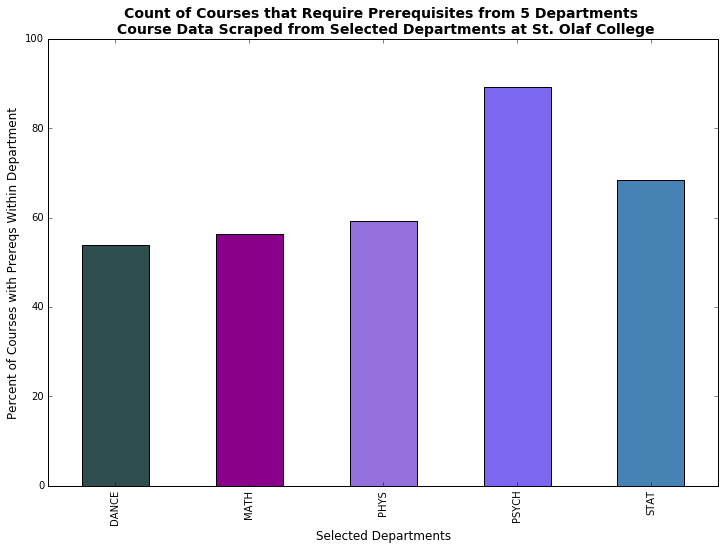

In [333]:
# Take all rows of dataframe where prereq field is not null, group by department, and plot
pctprereq_df.plot(kind='bar', figsize=(12,8), legend=None,
                  color=['darkslategray', 'darkmagenta', 'mediumpurple', 'mediumslateblue', 'steelblue'])
# Set Y-axis label
plt.ylabel("Percent of Courses with Prereqs Within Department", fontsize=12)
# Set X-axis label
plt.xlabel("Selected Departments", fontsize=12)
# Set y-axis range
plt.ylim(0, 100)
# Provide a plot title
plt.title("Count of Courses that Require Prerequisites from 5 Departments \n Course Data Scraped from " \
          "Selected Departments at St. Olaf College", fontsize=14, fontweight='bold')
# Save plot as jpg
plt.savefig('stolafvis.jpg')